In [1]:
import pandas as pd

In [75]:
df = pd.read_excel("LIFE223-202324/testing.xlsx")

In [3]:
df.columns

Index(['last_name', 'first_name', 'sis_user_id', 'submitted_at',
       'seconds_late', 'status', 'posted_at', 'score', 'grader', 'comments',
       'url', 'RATING_Knowledge Base and Relevance', 'RATING_Comprehension',
       'RATING_Synthesis and Evaluation', 'RATING_Structure',
       'RATING_Use of Supplementary Material', 'RATING_Language',
       'RATING_Presentation and Layout', 'RATING_Academic Integrity',
       'SCORE_Knowledge Base and Relevance', 'SCORE_Comprehension',
       'SCORE_Synthesis and Evaluation', 'SCORE_Structure',
       'SCORE_Use of Supplementary Material', 'SCORE_Language',
       'SCORE_Presentation and Layout', 'SCORE_Academic Integrity', 'moderate',
       'moderate_reason', 'rubric_score_diff', 'comment_word_count'],
      dtype='object')

In [6]:
# Generate a boxplot for score
df = df[df["score"]>0]

In [14]:
# Group by grader and get mean score
grouped = df.groupby("grader")["score"].mean()

# Convert grouped to dataframe and name values column "score"
grouped = grouped.reset_index(name="score")

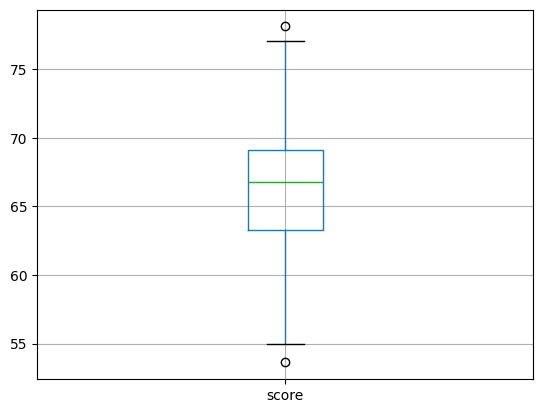

In [21]:
# Generate a boxplot for grouped score
grouped.boxplot()

import matplotlib.pyplot as plt
plt.show()



In [25]:
# identify the outliers
# IQR = Q3 - Q1
Q1 = grouped["score"].quantile(0.25)
Q3 = grouped["score"].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR
outliers = grouped[(grouped["score"] < Q1-1*IQR) | (grouped["score"] > Q3+1*IQR)]
print(outliers)

                           grader      score
5   Campos Soares Da Rocha, Sonia  76.700000
7                 Chapman, Elinor  53.625000
19                     Eyers, Pat  77.083333
57        Subramaniam, Krishanthi  78.125000
63                    Viney, Mark  55.000000


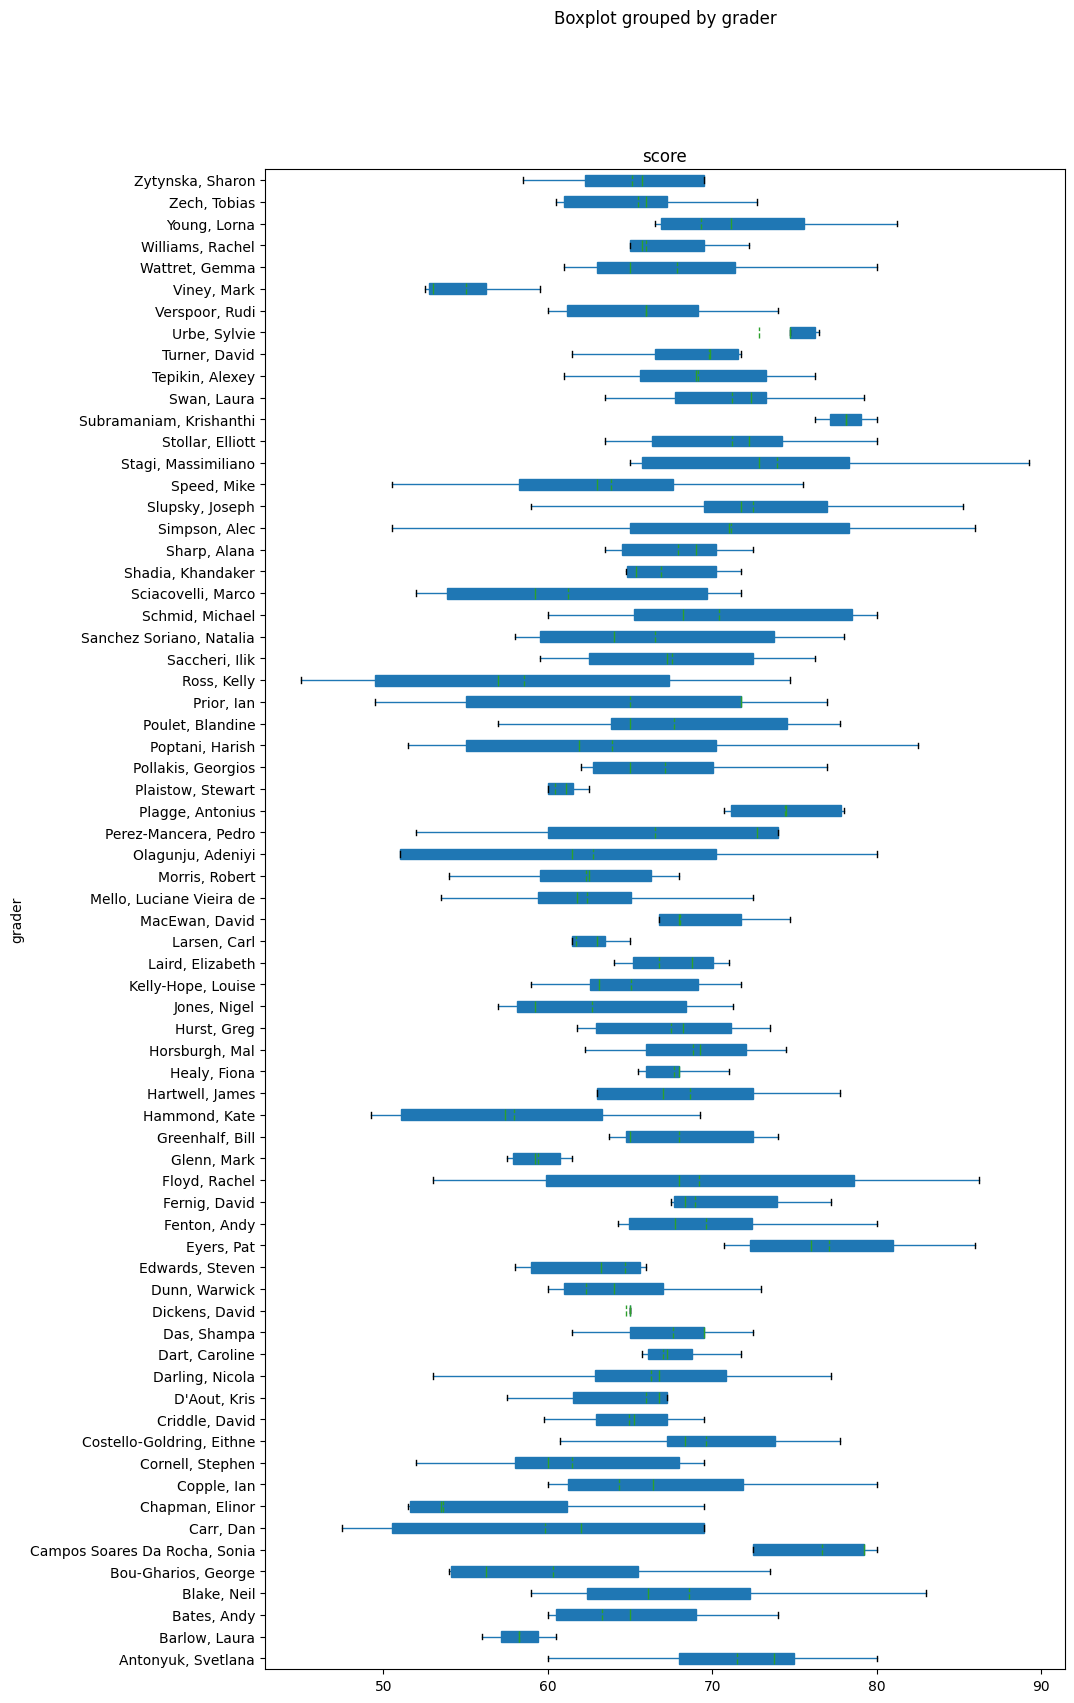

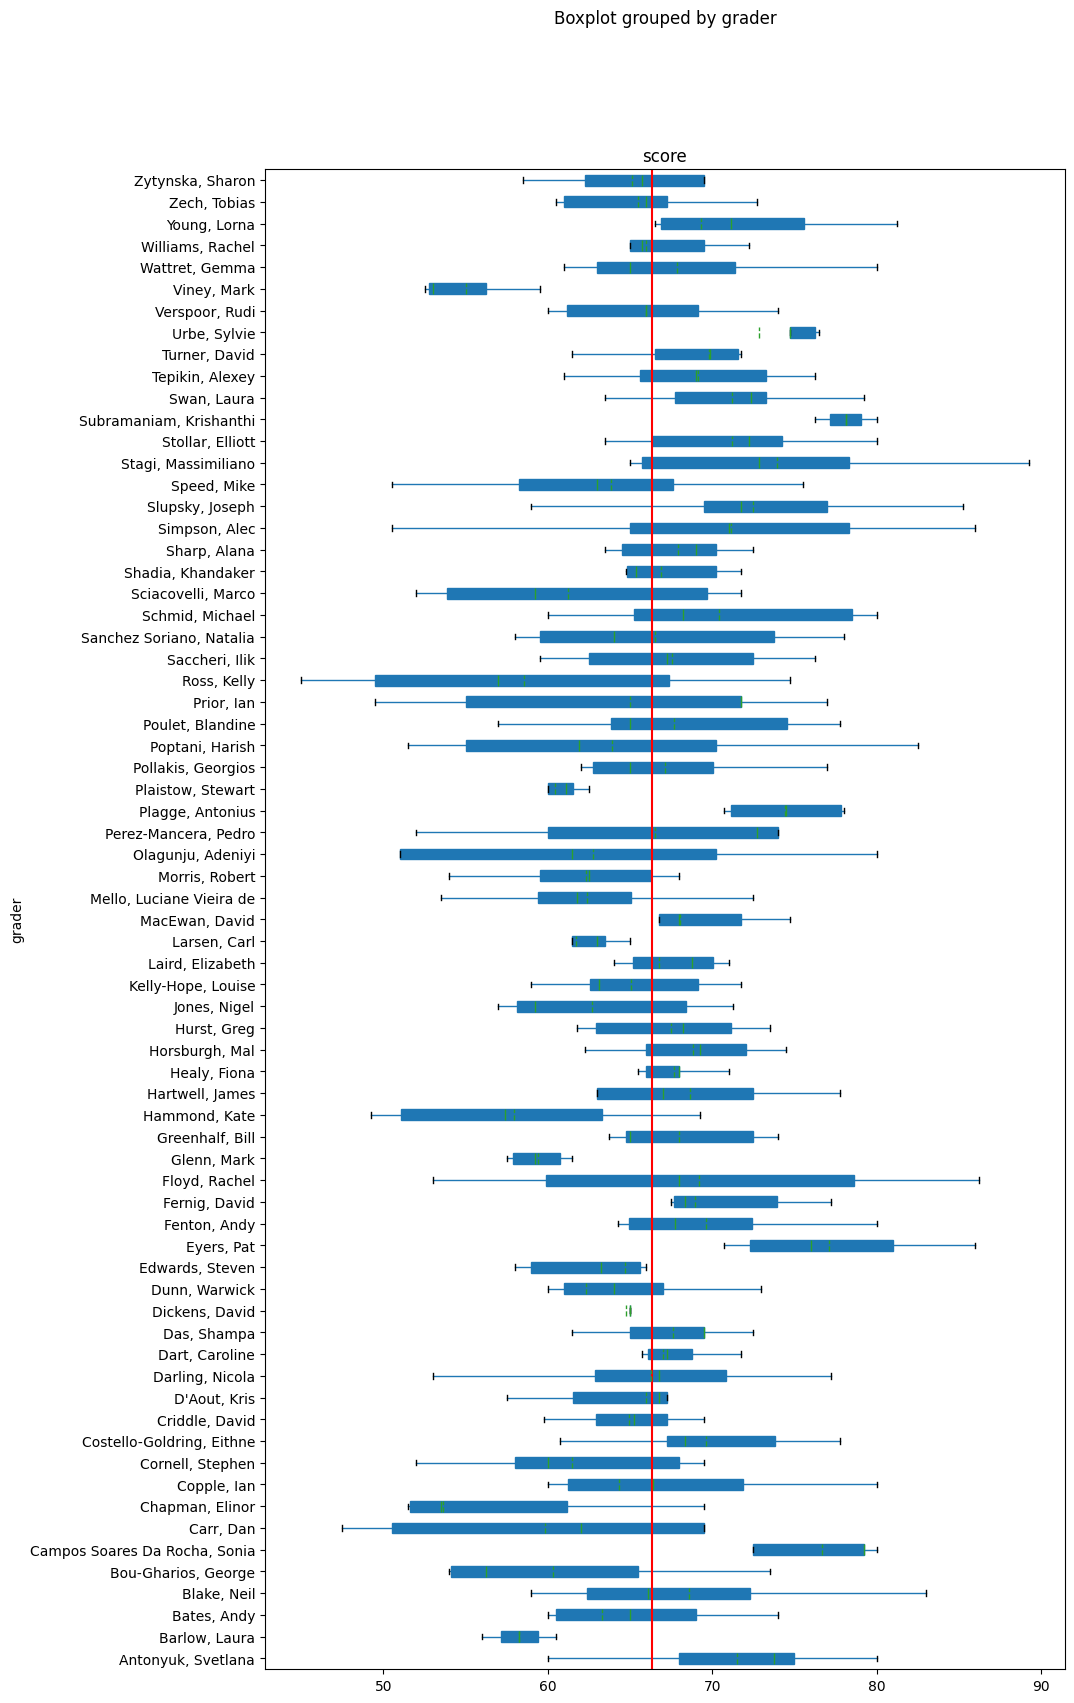

In [37]:
sorted_grouped = grouped.sort_values("score")
df.boxplot(column="score", by="grader", vert=False, showmeans=True, meanline=True, patch_artist=True, showfliers=False, grid=False, figsize=(10,20))

# order boxes by mean score
sorted_grouped = grouped.sort_values("score")
df.boxplot(column="score", by="grader", vert=False, showmeans=True, meanline=True, patch_artist=True, showfliers=False, grid=False, figsize=(10,20), positions=range(1, len(sorted_grouped)+1))

# show mean vertical line (red)
plt.axvline(x=grouped["score"].mean(), color="red")
plt.show()

In [38]:
import seaborn as sns

In [44]:
median_scores = df.groupby('grader')['score'].median().reset_index()

In [45]:
median_scores

,grader,score
0,"Antonyuk, Svetlana",73.750
1,"Barlow, Laura",58.250
2,"Bates, Andy",65.000
3,"Blake, Neil",66.125
4,"Bou-Gharios, George",56.250
...,...,...
64,"Wattret, Gemma",65.000
65,"Williams, Rachel",65.750
66,"Young, Lorna",71.125
67,"Zech, Tobias",66.000


In [46]:
ordered_graders = median_scores.sort_values('score')['grader']

In [47]:
ordered_graders

63                      Viney, Mark
7                   Chapman, Elinor
4               Bou-Gharios, George
45                      Ross, Kelly
25                    Hammond, Kate
                  ...              
39                 Plagge, Antonius
61                     Urbe, Sylvie
19                       Eyers, Pat
57          Subramaniam, Krishanthi
5     Campos Soares Da Rocha, Sonia
Name: grader, Length: 69, dtype: object

In [48]:
plt.figure(figsize=(10, 20))

sns.boxplot(x='score', y='grader', data=df, order=ordered_graders, orient='h', showmeans=True)


<Axes: xlabel='score', ylabel='grader'>

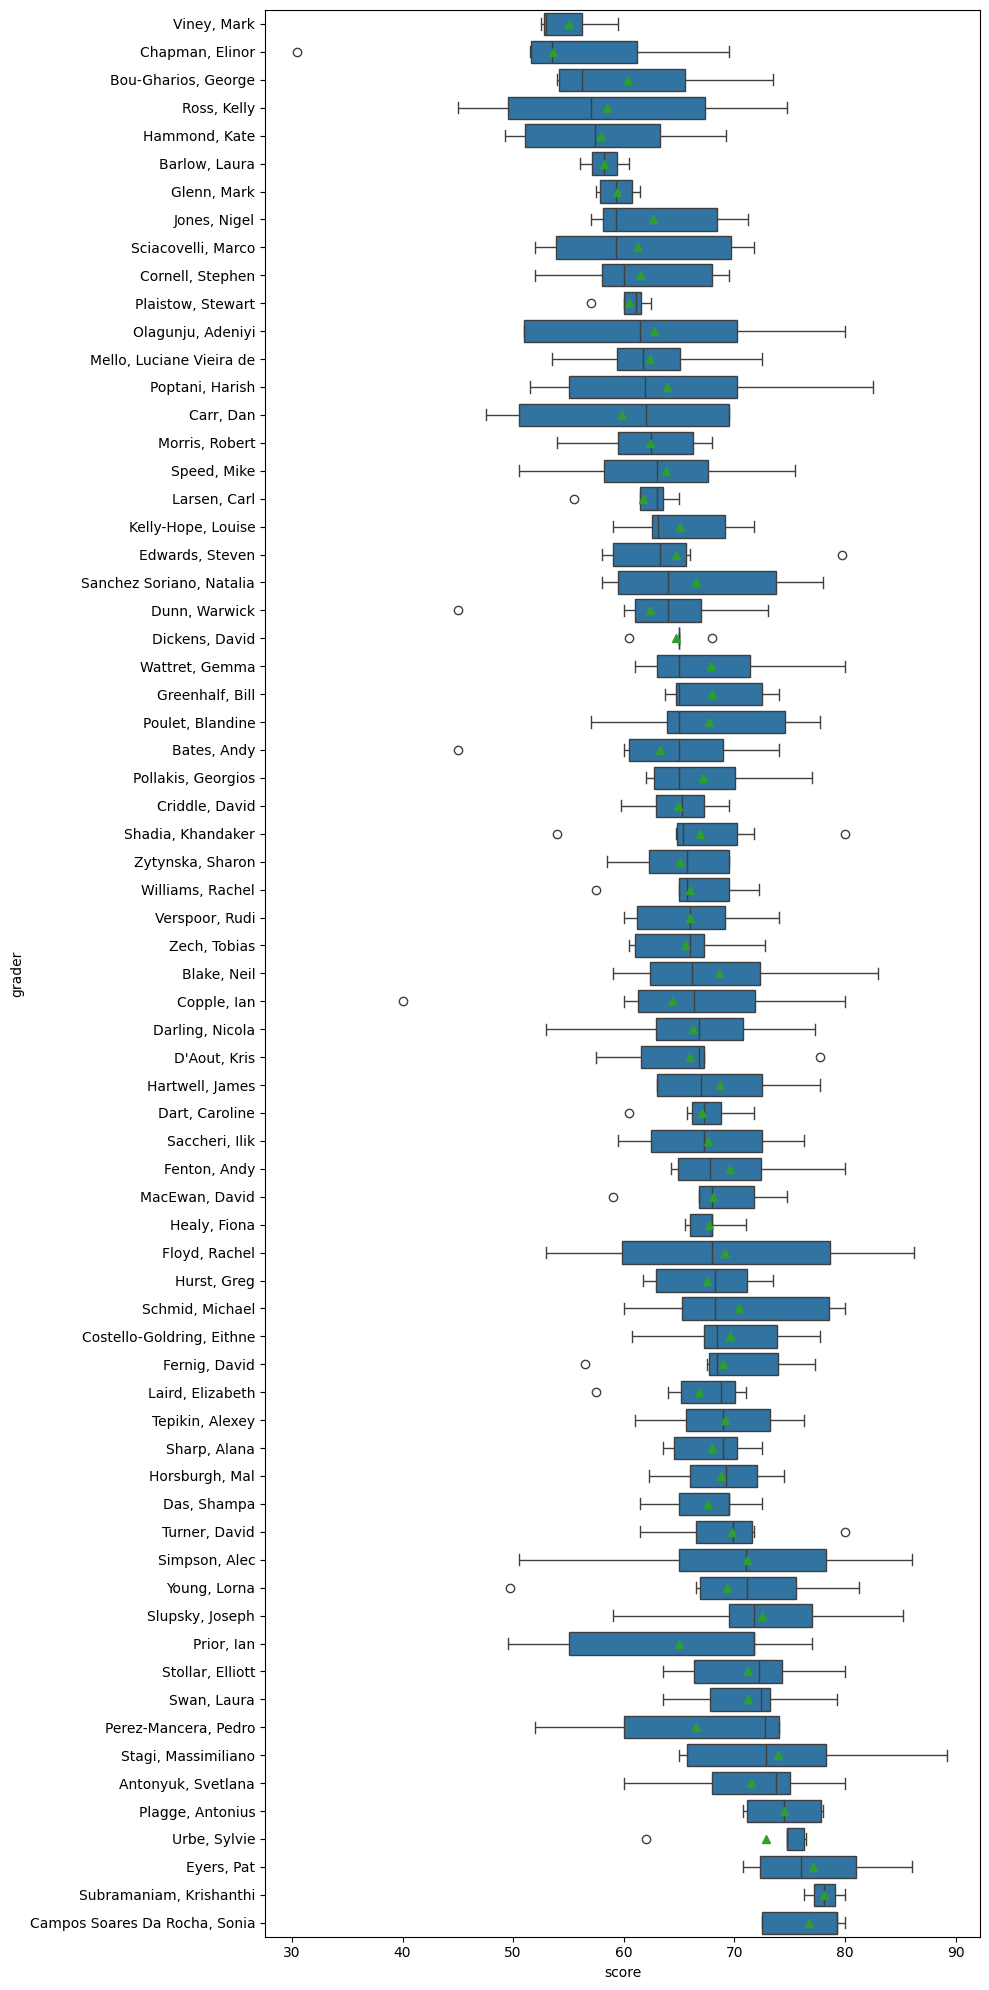

In [49]:
plt.tight_layout()
plt.show()

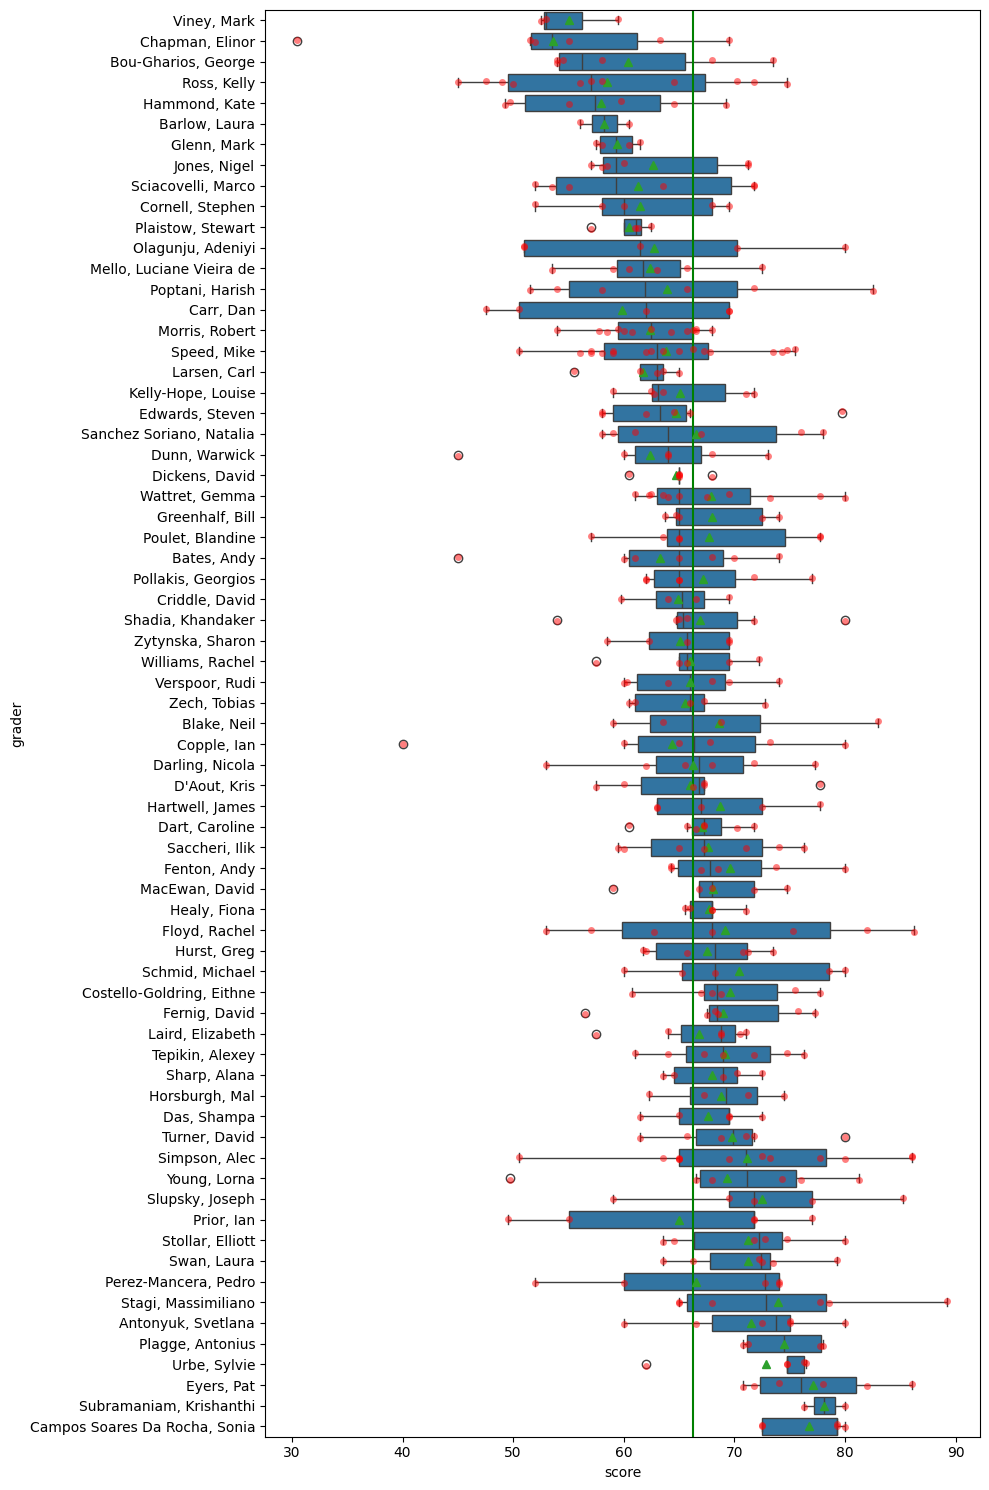

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median scores for each grader
median_scores = df.groupby('grader')['score'].median().reset_index()

# Sort the graders by median score
ordered_graders = median_scores.sort_values('score')['grader']

# Create the horizontal boxplot
plt.figure(figsize=(10, 15))
sns.boxplot(x='score', y='grader', data=df, order=ordered_graders, orient='h', showmeans=True)

# Overlay the strip plot to show individual scores as red dots
sns.stripplot(x='score', y='grader', data=df, order=ordered_graders, color='red', size=5, jitter=True, orient='h', alpha=0.5)

# Add a vertical line for the mean score (green!)
plt.axvline(x=df['score'].mean(), color='green')

# Show plot
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Calculate global median score
global_median = df['score'].median()

# Initialize list to store results
results = []

# Perform analysis for each grader
for grader in df['grader'].unique():
    grader_scores = df[df['grader'] == grader]['score']
    
    # Calculate median and mean for the grader's scores
    median_score = grader_scores.median()
    mean_score = grader_scores.mean()
    
    # Compare grader scores against all other scores using Mann-Whitney U test
    other_scores = df[df['grader'] != grader]['score']
    U_stat, p_value = stats.mannwhitneyu(grader_scores, other_scores, alternative='two-sided')
    
    # Append results
    results.append({
        'Grader': grader,
        'Median Score': median_score,
        'Mean Score': mean_score,
        'P-Value': p_value
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Order the DataFrame by increasing median score
results_df.sort_values('Median Score', inplace=True)

# Display the results
results_df


,Grader,Median Score,Mean Score,P-Value
43,"Juin, Alexina",0.000,0.000000,0.002846
3,"Viney, Mark",53.000,55.000000,0.019725
25,"Chapman, Elinor",53.500,53.625000,0.011321
34,"Bou-Gharios, George",56.250,60.333333,0.093882
22,"Ross, Kelly",57.000,58.522727,0.013438
...,...,...,...,...
50,"Plagge, Antonius",74.500,74.437500,0.031106
63,"Urbe, Sylvie",74.750,72.850000,0.048638
0,"Eyers, Pat",76.000,77.083333,0.002221
9,"Subramaniam, Krishanthi",78.125,78.125000,0.039398


In [66]:
results_df = results_df.sort_values("P-Value")

In [73]:
results_df.to_excel("results.xlsx", index=False)

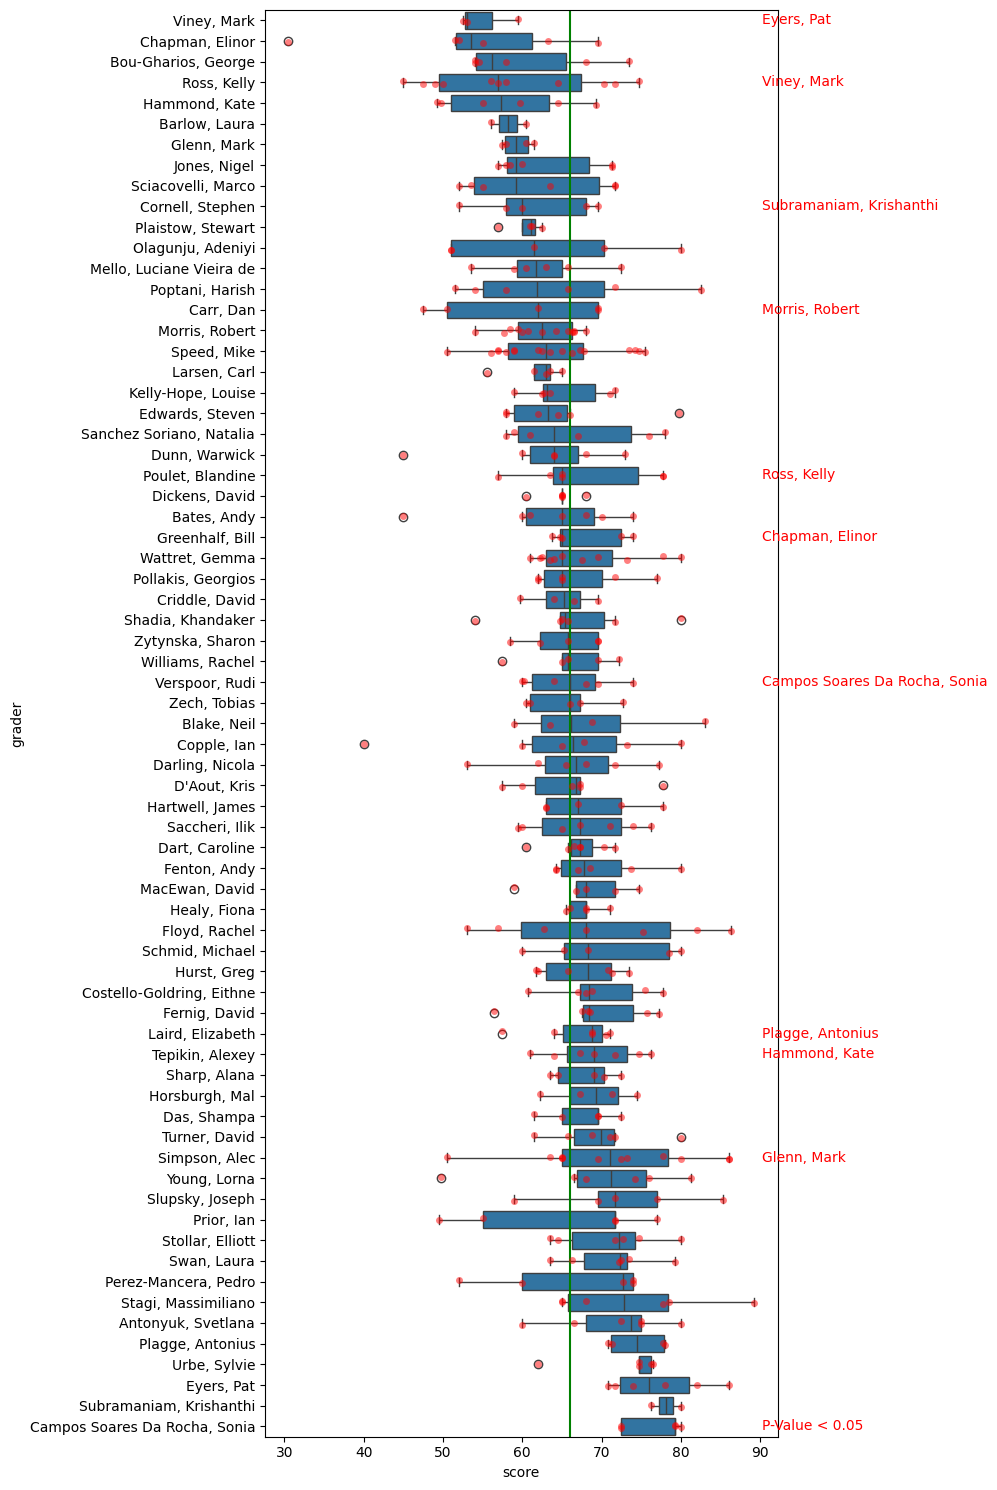

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = df[df["score"]>0]


# Calculate global median and mean
global_median = df['score'].median()
global_mean = df['score'].mean()

# Perform analysis for each grader
results = []
for grader in df['grader'].unique():
    grader_scores = df[df['grader'] == grader]['score']
    median_score = grader_scores.median()
    mean_score = grader_scores.mean()
    other_scores = df[df['grader'] != grader]['score']
    U_stat, p_value = stats.mannwhitneyu(grader_scores, other_scores, alternative='two-sided')
    results.append({'Grader': grader, 'Median Score': median_score, 'Mean Score': mean_score, 'P-Value': p_value})

results_df = pd.DataFrame(results)
results_df.sort_values('Median Score', inplace=True)

# Create the horizontal boxplot
plt.figure(figsize=(10, 15))
sns.boxplot(x='score', y='grader', data=df, order=results_df['Grader'], orient='h')

# Overlay the strip plot to show individual scores
sns.stripplot(x='score', y='grader', data=df, order=results_df['Grader'], color='red', size=5, jitter=True, orient='h', alpha=0.5)

# Annotate boxes with "*" where P-Value < 0.05
for i, row in results_df.iterrows():
    if row['P-Value'] < 0.05:
        plt.text(x=df['score'].max() + 1, y=i, s=f"{row['Grader']}", fontsize=10, color='red', verticalalignment='center')

# Add a vertical line for the global median score
plt.axvline(x=global_median, color='green')

# legend
plt.text(x=df['score'].max() + 1, y=results_df.shape[0] - 1, s="P-Value < 0.05", fontsize=10, color='red', verticalalignment='center')

plt.tight_layout()
plt.show()


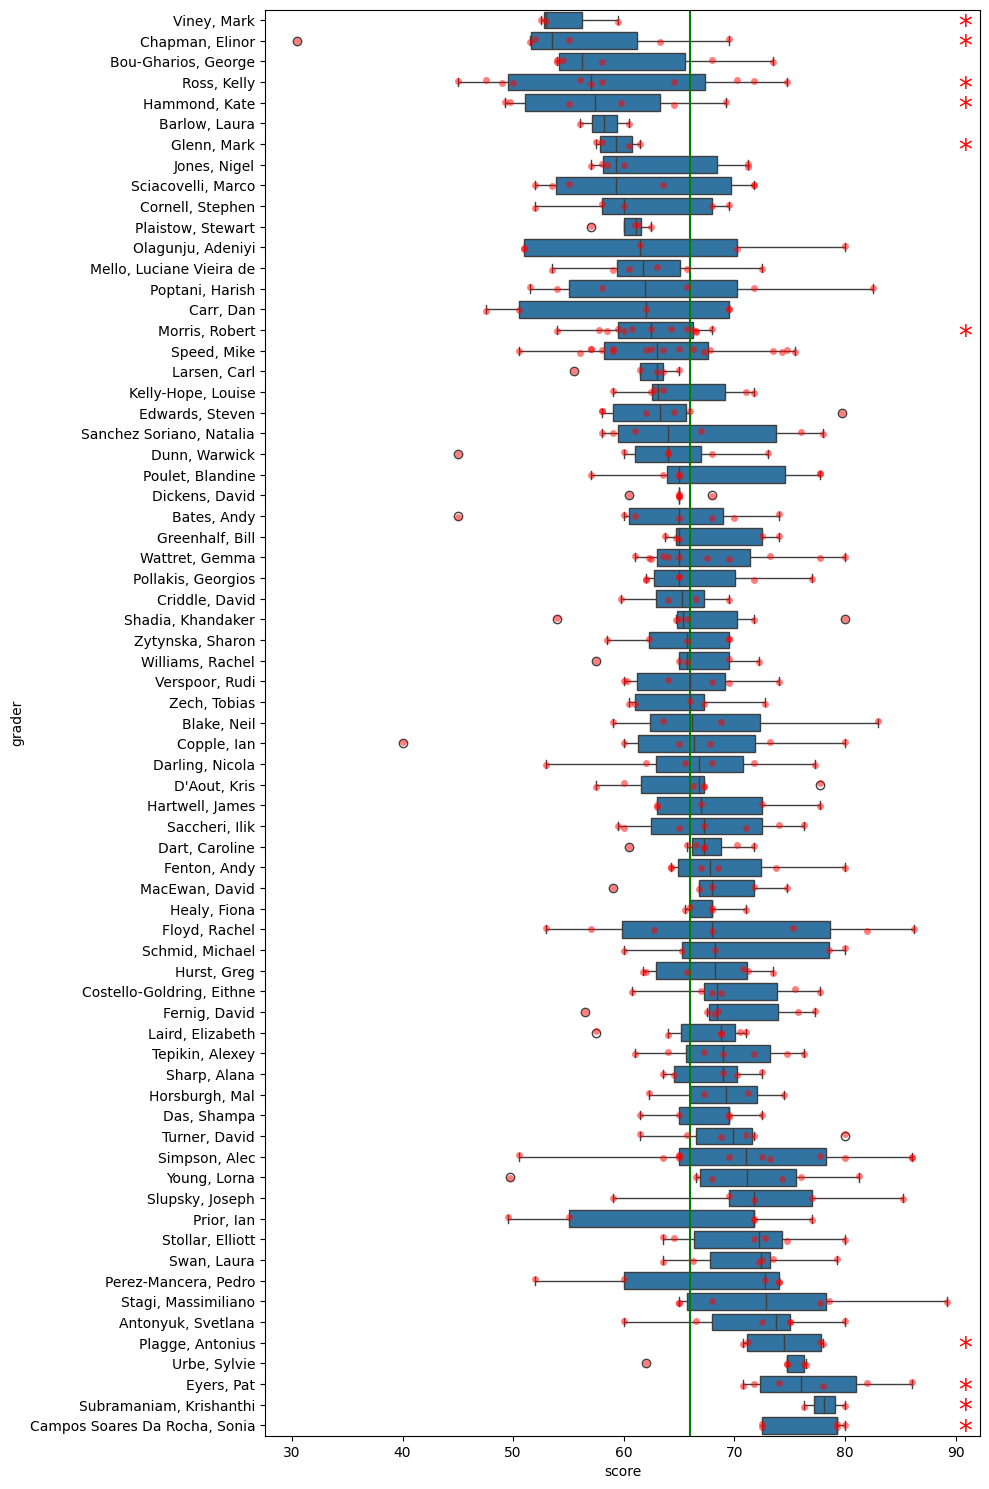

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df is already defined and filtered for scores > 0

# Calculate global median and mean
global_median = df['score'].median()
global_mean = df['score'].mean()

# Perform analysis for each grader
results = []
for grader in df['grader'].unique():
    grader_scores = df[df['grader'] == grader]['score']
    median_score = grader_scores.median()
    mean_score = grader_scores.mean()
    other_scores = df[df['grader'] != grader]['score']
    U_stat, p_value = stats.mannwhitneyu(grader_scores, other_scores, alternative='two-sided')
    results.append({'Grader': grader, 'Median Score': median_score, 'Mean Score': mean_score, 'P-Value': p_value})

results_df = pd.DataFrame(results)
results_df.sort_values('Median Score', inplace=True)

# Create the horizontal boxplot
plt.figure(figsize=(10, 15))
box_plot = sns.boxplot(x='score', y='grader', data=df, order=results_df['Grader'], orient='h')

# Overlay the strip plot to show individual scores
sns.stripplot(x='score', y='grader', data=df, order=results_df['Grader'], color='red', size=5, jitter=True, orient='h', alpha=0.5)

# Add a vertical line for the global median score
plt.axvline(x=global_median, color='green')

# Annotate significant differences
for i, grader in enumerate(results_df['Grader']):
    if results_df[results_df['Grader'] == grader]['P-Value'].values[0] < 0.05:
        plt.text(x=df['score'].max() + 1, y=i+0.3, s=f"*", fontsize=20, color='red', verticalalignment='center')



plt.tight_layout()
plt.show()

# save the plot
box_plot.figure.savefig("boxplot.png")


In [117]:
# I want to embed this image in a .docx file with a figure caption

from docx import Document
from docx.shared import Inches

# Create a new Document
doc = Document()

# Add a title
doc.add_heading('Grader Scores Analysis', level=1)

# Add the boxplot
doc.add_picture('boxplot.png', width=Inches(5))

# Add a figure caption
doc.add_paragraph('Figure 1: Boxplot of grader scores. The green line represents the global median score. '
                  'Graders with significant differences in scores are marked with an asterisk.')

# get graders with P-Value < 0.05
significant_graders = results_df[results_df["P-Value"] < 0.05]

# Format median and mean values to 2 decimal places
significant_graders["Median Score"] = significant_graders["Median Score"].map("{:.2f}".format)
significant_graders["Mean Score"] = significant_graders["Mean Score"].map("{:.2f}".format)

# Format P-Value to scientific notation
significant_graders["P-Value"] = significant_graders["P-Value"].map(lambda x: f"{x:.2e}")


# Add significatn_graders dataframe as table to document
t = doc.add_table(significant_graders.shape[0]+1, significant_graders.shape[1])

# add the header rows.
for j in range(significant_graders.shape[-1]):
    t.cell(0,j).text = significant_graders.columns[j]

# add the rest of the data frame
for i in range(significant_graders.shape[0]):
    for j in range(significant_graders.shape[-1]):
        t.cell(i+1,j).text = str(significant_graders.values[i,j])

# Save the document
doc.save('grader_scores_analysis.docx')


C:\Users\treharne\AppData\Local\Temp\ipykernel_14016\2679985565.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_graders["Median Score"] = significant_graders["Median Score"].map("{:.2f}".format)
C:\Users\treharne\AppData\Local\Temp\ipykernel_14016\2679985565.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_graders["Mean Score"] = significant_graders["Mean Score"].map("{:.2f}".format)
C:\Users\treharne\AppData\Local\Temp\ipykernel_14016\2679985565.py:27: SettingWithCopyWarnin

In [112]:
significant_graders

,Grader,Median Score,Mean Score,P-Value
3,"Viney, Mark",53.000,55.000000,0.017765
25,"Chapman, Elinor",53.500,53.625000,0.009815
22,"Ross, Kelly",57.000,58.522727,0.011323
50,"Hammond, Kate",57.375,57.916667,0.020638
55,"Glenn, Mark",59.250,59.375000,0.036692
14,"Morris, Robert",62.500,62.326923,0.037547
49,"Plagge, Antonius",74.500,74.437500,0.031861
0,"Eyers, Pat",76.000,77.083333,0.002286
9,"Subramaniam, Krishanthi",78.125,78.125000,0.039669
32,"Campos Soares Da Rocha, Sonia",79.250,76.700000,0.003378


In [113]:
# add significant graders to the document
doc.add_heading('Significant Graders', level=2)



doc.save('grader_scores.docx')

In [114]:
# filter df by significant_graders
significant_scores = df[df["grader"].isin(significant_graders["Grader"])]

In [115]:
significant_scores

,last_name,first_name,sis_user_id,submitted_at,seconds_late,status,posted_at,score,grader,comments,...,SCORE_Synthesis and Evaluation,SCORE_Structure,SCORE_Use of Supplementary Material,SCORE_Language,SCORE_Presentation and Layout,SCORE_Academic Integrity,moderate,moderate_reason,rubric_score_diff,comment_word_count
0,Alkandari,Alzain,201615709psaalka7,2023-10-17T01:42:41Z,0,graded,2023-10-24T08:37:26Z,74.00,"Eyers, Pat","Good essay Alzain, really well written. Could ...",...,12.00,6.50,12.00,4.00,4.00,0.0,False,NaN,0.0,43
5,Armstrong,Yuuki,201616974hlyarmst,2023-10-13T11:10:43Z,0,graded,2023-10-24T08:37:26Z,52.50,"Viney, Mark","Your introduction is good, setting the scene a...",...,6.75,4.50,8.25,2.75,2.75,0.0,False,NaN,0.0,502
10,Baxter,Katie,201649553hlkbaxt3,2023-10-20T11:38:11Z,0,graded,2023-10-24T08:37:26Z,71.75,"Eyers, Pat",The essay takes on a complex area and is an in...,...,9.75,6.50,12.00,3.25,3.25,0.0,False,NaN,0.0,46
14,Brindle,Jade,201417889sgjbrind,2023-10-13T10:21:15Z,0,graded,2023-10-24T08:37:26Z,76.25,"Subramaniam, Krishanthi",Jade - I am really impressed. This essay is lo...,...,12.00,6.50,9.75,4.00,4.00,0.0,False,NaN,0.0,48
20,Carey,Maizy,201579490hlmcare2,2023-10-20T14:52:05Z,0,graded,2023-10-24T08:37:26Z,60.00,"Morris, Robert","Good effort with this essay, interesting point...",...,9.75,5.50,9.75,2.75,2.75,0.0,False,NaN,0.0,105
35,Donnelly,Caitlin,201610267hlcdonne,2023-10-18T20:23:37Z,0,graded,2023-10-24T08:37:26Z,57.00,"Ross, Kelly","A good effort, the introduction was well writt...",...,8.25,5.50,9.75,3.25,2.75,0.0,True,"Final score is different to rubric total,",5.0,55
39,Fatima,Alina,201570198hlafatim,2023-10-13T10:47:41Z,0,graded,2023-10-24T08:37:26Z,55.00,"Chapman, Elinor",Good things:\n* You've clearly read a lot of g...,...,8.25,5.50,9.75,2.75,3.25,0.0,False,NaN,0.0,125
51,Hanlon,Jess,201590205psjhanl2,2023-10-13T11:26:24Z,0,graded,2023-10-24T08:37:26Z,80.00,"Campos Soares Da Rocha, Sonia",An excellent essay covering all major aspects ...,...,12.00,8.00,12.00,4.00,4.00,0.0,False,Comment word count is more than 1 standard dev...,0.0,18
60,Hussain,Haadiya,201558199hlhhuss5,2023-10-20T15:11:45Z,405,graded,2023-10-24T08:37:26Z,78.00,"Eyers, Pat","Dear Prof Eyers,\nUnfortunately, I was having ...",...,15.00,8.00,12.00,4.00,4.00,0.0,True,"Final score is different to rubric total,",5.0,78
63,Jefferies,Amy,201545589hlajeffe,2023-10-13T10:50:07Z,0,graded,2023-10-24T08:37:26Z,80.00,"Subramaniam, Krishanthi",Well-done Amy! The essay is well-structured ty...,...,12.00,8.00,12.00,4.00,4.00,0.0,False,NaN,0.0,49
